1) a. 340 W/m^2. b. 54% reaches the Earth's surface (50% absorbed and 4% reflected by surface). c. The surface area of a sphere = 4 * pi * r^2. d. The surface area of the Earth = 4 * pi * (6371 km)^2 = 5.1e8 km^2. e. My answer is very similar to the answer on Wikipedia. f. Solar power striking TOA = 340 W/m^2 * 5.1e14 m^2 = 1.73e17 W. Solar power striking surface = 0.54 * 340 W/m^2 * 5.1e14 m^2 = 9.36e16 W. g. My answer is very similar to the answer on Wikipedia. h. The total human consumption of power is around 1.8e13 W and my striking-the-surface power is 9.36e16 W, which is more than total human consumption. i. 0.06 * 0.54 * 340 W/m^2 * x m^2 = 1.8e13 W. So x = 1.63e12 m^2 surface needed to produce enough power for all of mankind's energy needs. j. The area of Earth's land surface is about 1.48e14 m^2. 1.63e12 m^2 is about 1% of this. 

In [1]:
conda install basemap

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = loadmat('nogapswinds.mat')
print(data.keys())

lons = data['lons']
lats = data['lats']
ujanuary = data['ujanuary']
vjanuary = data['vjanuary']
ujuly = data['ujuly']
vjuly = data['vjuly']

dict_keys(['__header__', '__version__', '__globals__', 'lats', 'lons', 'ujanuary', 'vjanuary', 'ujuly', 'vjuly'])


In [4]:
x,y = np.meshgrid(lons,lats)
#print(x.shape,y.shape)

# "Decimate" the variables
xdecimate = x[::8,::8]
ydecimate = y[::8,::8]
ujanuarydecimate = ujanuary[::8,::8]
vjanuarydecimate = vjanuary[::8,::8]
ujulydecimate = ujuly[::8,::8]
vjulydecimate = vjuly[::8,::8]

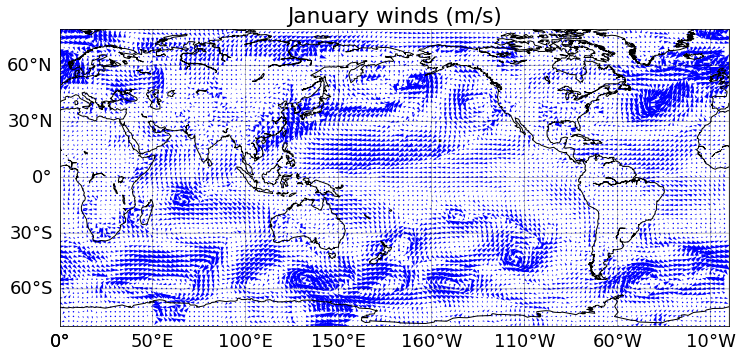

In [5]:
# First set the default fontsize
font = {'size'   : 18}
matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))
m = Basemap(projection='cyl',llcrnrlat=-80,llcrnrlon=0,urcrnrlat=80,urcrnrlon=360)
m.drawcoastlines()
m.quiver(xdecimate,ydecimate,ujanuarydecimate,vjanuarydecimate,color='b')
meridians = np.arange(0,360,50)
m.drawmeridians(meridians,labels=[1,0,0,1],linewidth=0.5);
parallels = np.arange(-90,90,30)
m.drawparallels(parallels,labels=[1,0,0,1],linewidth=0.5);
plt.title('January winds (m/s)');
plt.savefig('January_winds.png')

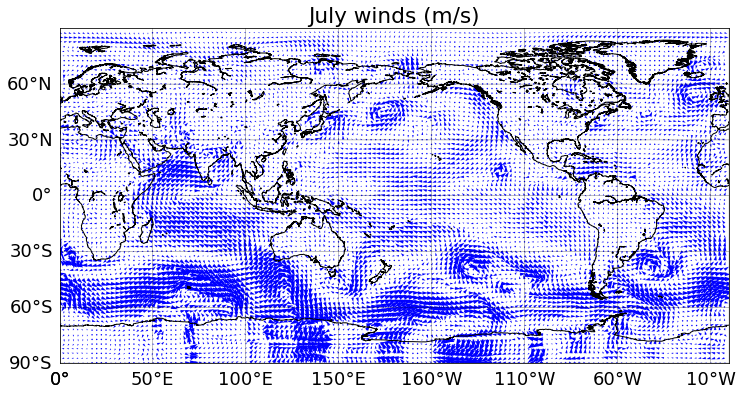

In [6]:
plt.figure(figsize=(12,12))
m = Basemap(projection='cyl',llcrnrlat=-90,llcrnrlon=0,urcrnrlat=90,urcrnrlon=360,lat_ts=20,resolution='l')
m.drawcoastlines()
m.quiver(xdecimate,ydecimate,ujulydecimate,vjulydecimate,color='b')
meridians = np.arange(0,360,50)
m.drawmeridians(meridians,labels=[1,0,0,1],linewidth=0.5);
parallels = np.arange(-90,90,30)
m.drawparallels(parallels,labels=[1,0,0,1],linewidth=0.5);
plt.title('July winds (m/s)');
plt.savefig('July_winds.png')

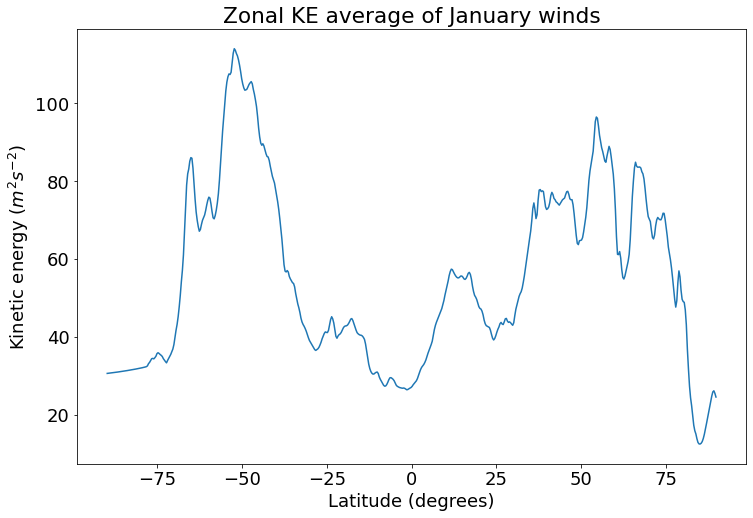

In [7]:
plt.figure(figsize=(12,8))
#print(lats.shape,ujanuary.shape,vjanuary.shape)
plt.plot(lats,np.mean((ujanuary**2 + vjanuary**2),axis=1))
plt.xlabel('Latitude (degrees)')
plt.ylabel('Kinetic energy ($m^2 s^{-2}$)')
plt.title('Zonal KE average of January winds')
plt.savefig('Zonal_KE_avg_Jan_winds.png')

In [8]:
# Specify the size of dA
dA = np.zeros((576,1152))

# Radius of the Earth
r_Earth = 6371000 # meters

# Define dy
dy = 2*np.pi*r_Earth*0.3125/360

for m in np.arange(576):
    dA[m,:] = dy*dy*np.cos(np.deg2rad(lats[m]))

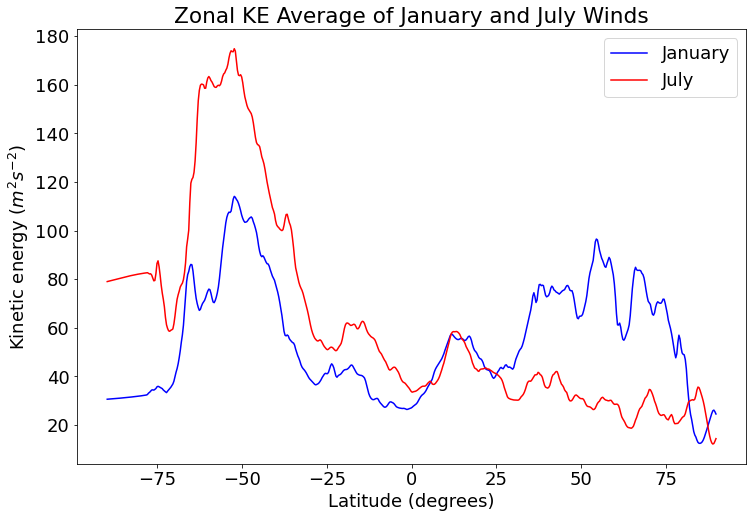

In [9]:
plt.figure(figsize=(12,8))
plt.plot(lats,np.mean((ujanuary**2 + vjanuary**2),axis=1),color='blue',label='January')
plt.plot(lats,np.mean((ujuly**2 + vjuly**2),axis=1),color='red',label='July')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Kinetic energy ($m^2 s^{-2}$)')
plt.legend()
plt.title('Zonal KE Average of January and July Winds')
plt.savefig('Zonal_KE_avg_Jan_Jul_winds.png')

2) a. Plot shown above. b) The average kinetic energies are stronger in January than in July in the northern hemisphere. c) The average kinetic energies are stronger in July than in January in the southern hemisphere. d) January is northern hemisphere winter so the kinetic energies are stronger than in July (summer) because it is colder so the atmosphere needs to transport more heat towards that hemisphere. July is southern hemisphere winter so heat is transported towards that hemisphere.  

In [11]:
np.sum(np.sum(dA))

510508519843060.6

2) e. Answer shown above. This answer is about the same as to what I got in 1d and 1e (if I convert my answer to meters squared instead of kilometers squared). 

1 W = 1 kg * m^2 * s^−3.
variables: density, drag coefficient, velocity, area.
Power = integral(wind stress * velocity * dA).
Power = integral(cd * density * velocity * velocity * velocity * dA).
Power = cd * density * velocity^3 * area.
Power per unit area = cd * density * velocity^3.

In [19]:
jan_power = np.sum(0.002 * 1.3 * (np.sum(dA)) * (ujanuary**3 + vjanuary**3)) # power
print(jan_power)

7.24122767788598e+19


In [13]:
jan_power_per_area = jan_power / (np.sum(dA)) # power per unit area
print(jan_power_per_area)

141843.42467216926


In [14]:
july_power = np.sum(0.002 * 1.3 * (np.sum(dA)) * (ujuly**3 + vjuly**3)) # power
print(july_power)

1.1574738751953922e+20


In [15]:
july_power_per_area = july_power / (np.sum(dA)) # power per unit area
print(july_power_per_area)

226729.59024292487


2) f. The wind power for our January snapshot is about 7.24e19 W, or about 1.42e5 W/m^2. g. The wind power for our July snapshot is about 1.16e20 W, or about 2.27e5 W/m^2. h. The wind power numbers are higher than the global human consumption of power discussed in 1h, so this suggests that wind power could (in theory) supply all of mankind's energy needs, but this would be covering all of the Earth's surface. According to the wikipedia page, these wind speeds are about average for 100m above the surface but the greatest wind speeds at this height are up to 9.75 m/s (and as low as 2.5 m/s), so available wind power could be greater higher above the surface. Global wind kinetic energy averaged 1.5 MJ/m^2 over the period from 1979-2010. Estimates of the capacity factors for wind installations are in the range of 35% to 44%. An optimum capacity factor of around 40–50% would be aimed for. Studies have indicated that 20% of the total annual electrical energy consumption may be incorporated with minimal difficulty. I was unable to find more relevant answers on this Wikipedia page.

In [16]:
np.mean((ujanuary**2 + vjanuary**2)**(1/2))

6.462390827901089

In [17]:
np.mean((ujuly**2 + vjuly**2)**(1/2))

6.817577908233496